In [38]:
import pandas
import numpy
import math


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Extracting the Data

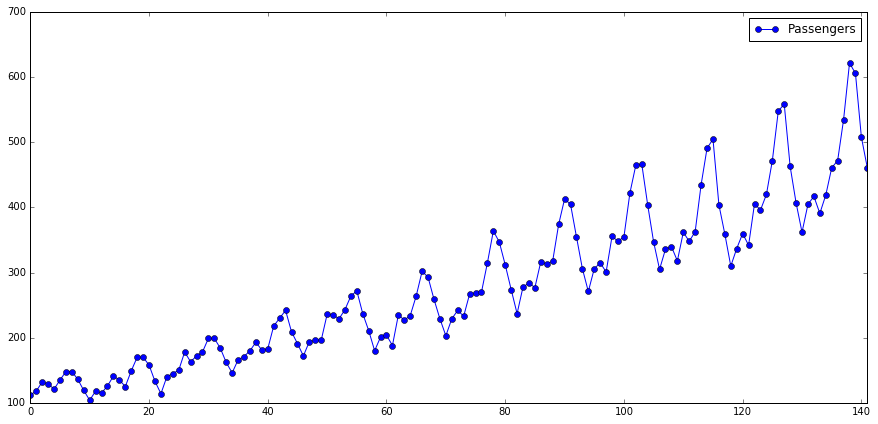

In [39]:
dataset = pandas.read_csv("Data/international-airline-passengers.csv", usecols=[1], engine='python', skipfooter=3,sep=";")
dataset.plot(figsize=(15,7),legend=True,linestyle='-',marker='o')

In [40]:
dataset.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


# Long Short-Term Memory Networks 

It can be used to create large recurrent networks, that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results.

Instead of neurons, LSTM networks have memory blocks that are connected into layers.

A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence and each gate within a block uses the sigmoid activation units to control whether they are triggered or not, making the change of state and addition of information flowing through the block conditional.

There are three types of gates within a unit:

    Forget Gate: conditionally decides what information to throw away from the block.
    Input Gate: conditionally decides which values from the input to update the memory state.
    Output Gate: conditionally decides what to output based on input and the memory of the block.

Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

# LSTM Network For Regression

###  What is regression ? 

    Regression is that we want to have as output a numerical value instead of classes

   To do so, we will write a lag function as follows : 
   
           F_target(t) = F(t+1)

In [41]:
# We will use Keras library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# And Scikit-Learn
from sklearn.preprocessing import MinMaxScaler

In [37]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
#dataframe = pandas.read_csv('Data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3,sep=';')

#  Here we take only the raw values dataframe['Passengers'] ! = dataframe.values

dataframe = pandas.read_csv("Data/data.csv", usecols=[1], engine='python',sep=";")

dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[ 1.73000002],
       [ 1.04999995],
       [ 0.80000001],
       [ 0.75      ],
       [ 0.58999997],
       [ 0.36000001],
       [ 0.34      ],
       [ 0.31      ],
       [ 0.19      ],
       [ 0.11      ],
       [ 0.49000001],
       [ 0.91000003],
       [ 1.34000003],
       [ 1.60000002],
       [ 1.60000002],
       [ 1.63      ],
       [ 1.38      ],
       [ 1.27999997],
       [ 1.46000004],
       [ 1.60000002],
       [ 1.49000001],
       [ 1.16999996],
       [ 0.83999997],
       [ 0.57999998],
       [ 0.56999999],
       [ 0.44999999],
       [ 0.60000002],
       [ 0.41999999],
       [ 0.55000001],
       [ 0.61000001],
       [ 0.37      ],
       [ 0.64999998],
       [ 1.24000001],
       [ 1.59000003],
       [ 1.75      ],
       [ 1.60000002],
       [ 1.75999999],
       [ 1.85000002],
       [ 1.53999996],
       [ 1.22000003],
       [ 1.38      ],
       [ 1.05999994],
       [ 0.81      ],
       [ 0.86000001],
       [ 0.81999999],
       [ 0

### a -  Preprocessing: Normalizing the data

In [5]:
# normalize the dataset thanks to scikit-learn
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset;

### b - spliting the data for futur testing 

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(249, 123)


### c - Creating a new DataSet with look_back

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [8]:
# X=t and Y=t+1
X, Y = create_dataset(dataset[1:10],1)

In [18]:
# reshape into X=t and Y=t+1

## The window 

look_back = 10

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: 

    data(X) = [samples, time steps, features].


In [19]:
trainX[0]

array([ 0.81818187,  0.47474751,  0.34848487,  0.32323235,  0.24242425,
        0.12626263,  0.11616162,  0.10101011,  0.04040404,  0.        ], dtype=float32)

In [20]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
trainX[0]

array([[ 0.81818187,  0.47474751,  0.34848487,  0.32323235,  0.24242425,
         0.12626263,  0.11616162,  0.10101011,  0.04040404,  0.        ]], dtype=float32)

Talk About the LSTM Architecture

## Training phase

#### The neuronal network has 1 input, a hidden layer with 4 LSTM blocks or neurons and an output layer that makes a single value prediction

In [34]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=500, batch_size=1, verbose=2)

Epoch 1/500
0s - loss: 0.1549
Epoch 2/500
0s - loss: 0.0629
Epoch 3/500
0s - loss: 0.0399
Epoch 4/500
0s - loss: 0.0249
Epoch 5/500
0s - loss: 0.0200
Epoch 6/500
0s - loss: 0.0182
Epoch 7/500
0s - loss: 0.0175
Epoch 8/500
0s - loss: 0.0171
Epoch 9/500
0s - loss: 0.0166
Epoch 10/500
0s - loss: 0.0158
Epoch 11/500
0s - loss: 0.0156
Epoch 12/500
0s - loss: 0.0150
Epoch 13/500
0s - loss: 0.0145
Epoch 14/500
0s - loss: 0.0142
Epoch 15/500
0s - loss: 0.0138
Epoch 16/500
0s - loss: 0.0140
Epoch 17/500
0s - loss: 0.0135
Epoch 18/500
0s - loss: 0.0134
Epoch 19/500
0s - loss: 0.0134
Epoch 20/500
0s - loss: 0.0132
Epoch 21/500
0s - loss: 0.0134
Epoch 22/500
0s - loss: 0.0129
Epoch 23/500
0s - loss: 0.0129
Epoch 24/500
0s - loss: 0.0127
Epoch 25/500
0s - loss: 0.0128
Epoch 26/500
0s - loss: 0.0123
Epoch 27/500
0s - loss: 0.0127
Epoch 28/500
0s - loss: 0.0125
Epoch 29/500
0s - loss: 0.0124
Epoch 30/500
0s - loss: 0.0124
Epoch 31/500
0s - loss: 0.0123
Epoch 32/500
0s - loss: 0.0125
Epoch 33/500
0s -

## Prediction 

In [35]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=1)
trainScore = math.sqrt(trainScore)
trainScore = scaler.inverse_transform(numpy.array([[trainScore]]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = model.evaluate(testX, testY, verbose=1)
testScore = math.sqrt(testScore)
testScore = scaler.inverse_transform(numpy.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))

 32/112 [=======>......................] - ETA: 0sTest Score: 0.33 RMSE


## Visualization

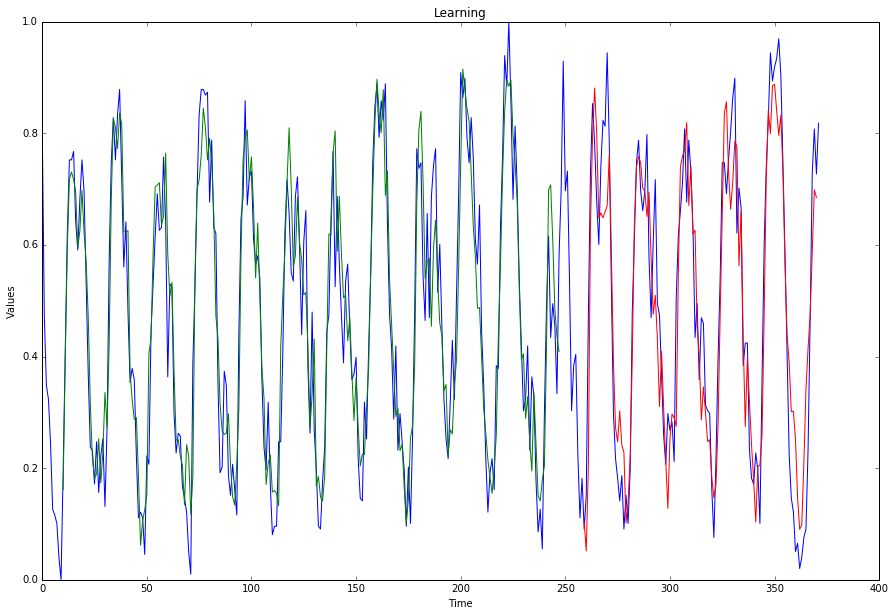

In [36]:
# generate predictions for training
trainPredict = model.predict(trainX,verbose=0)
testPredict = model.predict(testX,verbose=0)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions


plt.figure(figsize=(15, 10), dpi=100)
plt.title("Learning")
plt.xlabel("Time")
plt.ylabel("Values")
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)




plt.show()

In [141]:
Arr = numpy.array([1,2,3,4,5,6,7,8])

Arr3 = numpy.zeros_like(Arr)
Arr3
#trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
Arr3[:,] = numpy.nan
Arr3

array([-9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808])